In [17]:
from scipy.io import arff
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, completeness_score
from sklearn.metrics.cluster import contingency_matrix
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

data, meta = arff.loadarff('column_diagnosis.arff')

df = pd.DataFrame(data)

X = df[['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis']]
y = df['class']

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [18]:
#1

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# List of values of k
k_values = [2, 3, 4, 5]

# Initialize lists to store silhouette and purity scores
silhouette_scores = []
purity_scores = []

for k in k_values:
    # Perform k-means clustering
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    cluster_labels = kmeans.fit_predict(X_normalized)

    # Compute silhouette score
    silhouette_avg = silhouette_score(X_normalized, cluster_labels)

    # Compute purity score
    contingency_matrix_result = contingency_matrix(y, cluster_labels)
    purity = np.sum(np.max(contingency_matrix_result, axis=0)) / np.sum(contingency_matrix_result)

    # Append scores to the lists
    silhouette_scores.append(silhouette_avg)
    purity_scores.append(purity)

# Print the results
for k, silhouette, purity in zip(k_values, silhouette_scores, purity_scores):
    print(f'K={k}, Silhouette Score: {silhouette:.4f}, Purity: {purity:.4f}')



K=2, Silhouette Score: 0.3604, Purity: 0.6323
K=3, Silhouette Score: 0.2958, Purity: 0.6677
K=4, Silhouette Score: 0.2744, Purity: 0.6613
K=5, Silhouette Score: 0.2382, Purity: 0.6774


In [19]:
#2a

# Apply PCA to the normalized data with all components
pca = PCA()
pca.fit(X_normalized)

# Get the explained variance ratios for all principal components
explained_var_ratios = pca.explained_variance_ratio_

# Get the explained variance ratios for the top two principal components
top_two_var_ratios = explained_var_ratios[:2]

# Calculate the total variance explained by the top two principal components
total_variance_explained = sum(top_two_var_ratios)

print(f"Explained variance by the top two principal components: {total_variance_explained:.4f}")


Explained variance by the top two principal components: 0.7714


In [20]:
#2b

# Get the loadings (weights) for the top two principal components
top_two_loadings = pca.components_[:2]

# Create a list to store the sorted input variables by relevance for each component
sorted_variables = []

# Sort the input variables by their absolute loadings for each of the top two components
for component_loadings in top_two_loadings:
    component_sorted = [i for i in range(len(component_loadings))]
    component_sorted.sort(key=lambda i: abs(component_loadings[i]), reverse=True)
    sorted_variables.append(component_sorted)

# Print the sorted variables for each of the top two components
for component_num, component_sorted in enumerate(sorted_variables, start=1):
    print(f"Top Variables for Component {component_num}:")
    for idx in component_sorted:
        print(f"{X.columns[idx]} (Weight: {top_two_loadings[component_num-1][idx]:.4f})")
    print()


Top Variables for Component 1:
pelvic_incidence (Weight: 0.5916)
lumbar_lordosis_angle (Weight: 0.5151)
pelvic_tilt (Weight: 0.4670)
sacral_slope (Weight: 0.3257)
degree_spondylolisthesis (Weight: 0.2169)
pelvic_radius (Weight: -0.1158)

Top Variables for Component 2:
pelvic_tilt (Weight: -0.6704)
pelvic_radius (Weight: -0.5811)
sacral_slope (Weight: 0.4433)
pelvic_incidence (Weight: 0.1000)
lumbar_lordosis_angle (Weight: 0.0800)
degree_spondylolisthesis (Weight: 0.0046)



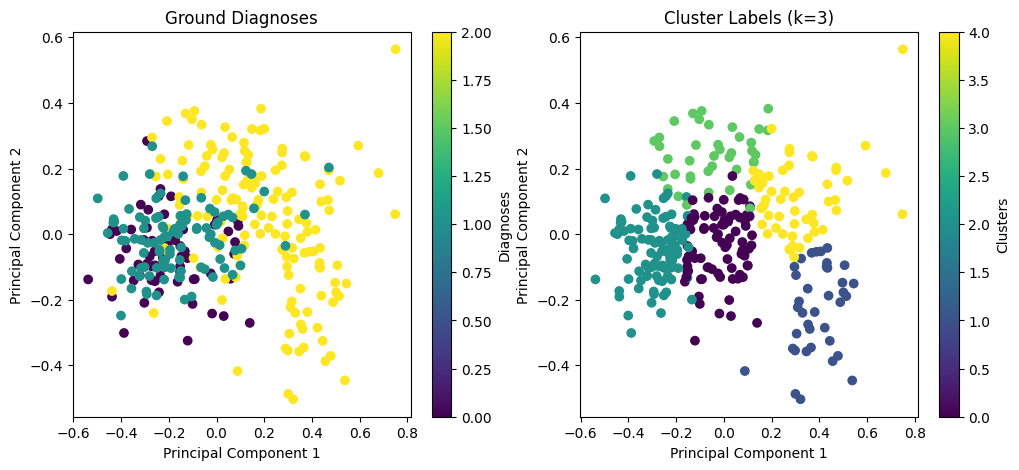

In [22]:
#3

# Fit PCA with 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_normalized)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])

# Add the ground truth diagnoses and cluster labels to the PCA DataFrame
pca_df['Diagnoses'] = y
pca_df['Cluster Labels'] = cluster_labels

# Set up a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))  # Corrected figsize parameter

# Plot the ground truth diagnoses
scatter1 = ax1.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'], c=pca_df['Diagnoses'], cmap='viridis')
ax1.set_title('Ground Diagnoses')
ax1.set_xlabel('Principal Component 1')
ax1.set_ylabel('Principal Component 2')
fig.colorbar(scatter1, ax=ax1, label='Diagnoses')

# Plot the cluster labels
scatter2 = ax2.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'], c=pca_df['Cluster Labels'], cmap='viridis')
ax2.set_title('Cluster Labels (k=3)')
ax2.set_xlabel('Principal Component 1')
ax2.set_ylabel('Principal Component 2')
fig.colorbar(scatter2, ax=ax2, label='Clusters')

plt.show()

